In [1]:
from fitparse import FitFile

In [2]:
fitfile = FitFile('./2017-11-03-15-58-49.fit')

In [3]:
fitfile.parse()

In [4]:
messages = fitfile.messages
print '{} messages'.format(len(messages))

4564 messages


In [5]:
for i in range(0,10):
    msg = messages[i]
    print 'message no. {}'.format(i)
    print msg.name
    print msg.get_values()

message no. 0
file_id
{'number': None, 'time_created': datetime.datetime(2017, 11, 3, 22, 58, 49), 'garmin_product': 'edge500', 'serial_number': 3888613190, 'type': 'activity', 'manufacturer': 'garmin'}
message no. 1
file_creator
{'hardware_version': None, 'software_version': 330}
message no. 2
event
{'timestamp': datetime.datetime(2017, 11, 3, 22, 58, 49), 'event_group': 0, 'timer_trigger': 'manual', 'event': 'timer', 'event_type': 'start'}
message no. 3
device_info
{'device_index': 'creator', 'cum_operating_time': None, 'software_version': 3.3, 'timestamp': datetime.datetime(2017, 11, 3, 22, 58, 49), 'battery_voltage': None, 'hardware_version': None, 'unknown_8': None, 'unknown_9': None, 'garmin_product': 'edge500', 'unknown_15': None, 'unknown_16': None, 'serial_number': 3888613190, 'device_type': 'antfs', 'battery_status': None, 'manufacturer': 'garmin'}
message no. 4
device_info
{'product': None, 'device_index': 1, 'cum_operating_time': None, 'software_version': None, 'timestamp':

In [6]:
field_samples = {}
for msg in messages:    
    field_samples[msg.name] = msg
    
print field_samples 

{'file_creator': <DataMessage: file_creator (#49) -- local mesg: #1, fields: [software_version: 330, hardware_version: None]>, 'record': <DataMessage: record (#20) -- local mesg: #9, fields: [timestamp: 2017-11-04 00:15:32, position_lat: 541307935, position_long: -1463201963, distance: 24007.99, enhanced_altitude: 79.4, altitude: 79.4, enhanced_speed: 2.469, speed: 2.469, power: 0, heart_rate: 112, cadence: 20, temperature: 17]>, 'device_info': <DataMessage: device_info (#23) -- local mesg: #3, fields: [timestamp: 2017-11-04 00:15:32, serial_number: 84610685, cum_operating_time: None, unknown_8: None, unknown_15: 17920, unknown_16: 321, manufacturer: None, product: None, software_version: None, battery_voltage: None, device_index: 3, device_type: bike_power, hardware_version: None, unknown_9: 98, battery_status: None]>, 'session': <DataMessage: session (#18) -- local mesg: #11, fields: [timestamp: 2017-11-04 00:15:42, start_time: 2017-11-03 22:58:49, start_position_lat: 541307315, star

In [7]:
for k in field_samples:
    print 'Message type: {}'.format(k)
    print field_samples[k].get_values()
    print ''

Message type: file_creator
{'hardware_version': None, 'software_version': 330}

Message type: record
{'distance': 24007.99, 'temperature': 17, 'power': 0, 'heart_rate': 112, 'timestamp': datetime.datetime(2017, 11, 4, 0, 15, 32), 'altitude': 79.39999999999998, 'position_long': -1463201963, 'enhanced_speed': 2.469, 'position_lat': 541307935, 'speed': 2.469, 'enhanced_altitude': 79.39999999999998, 'cadence': 20}

Message type: device_info
{'product': None, 'device_index': 3, 'cum_operating_time': None, 'software_version': None, 'timestamp': datetime.datetime(2017, 11, 4, 0, 15, 32), 'battery_voltage': None, 'hardware_version': None, 'unknown_8': None, 'unknown_9': 98, 'unknown_15': 17920, 'unknown_16': 321, 'serial_number': 84610685, 'device_type': 'bike_power', 'battery_status': None, 'manufacturer': None}

Message type: session
{'event_type': 'stop', 'total_timer_time': 4501.013, 'first_lap_index': 0, 'avg_power': 136, 'avg_heart_rate': 134, 'total_elapsed_time': 4602.355, 'total_work'

In [8]:
field_counts = {}
for msg in messages:
    if msg.name in field_counts:
        count = field_counts[msg.name]
        field_counts[msg.name] = count + 1
    else:
        field_counts[msg.name] = 1


In [9]:
for k in field_counts:
    print 'record type: {}, count: {}'.format(k, field_counts[k])

record type: file_creator, count: 1
record type: record, count: 4496
record type: device_info, count: 20
record type: session, count: 1
record type: file_id, count: 1
record type: activity, count: 1
record type: lap, count: 8
record type: event, count: 7
record type: unknown_22, count: 29


In [10]:
# Show the file type is activity - see section 9 in the FIT file doc for details
fid = field_samples['file_id']
print fid.get_value('type')

activity


In [11]:
# Show the activity
activity = field_samples['activity']
print activity.get_values()

{'num_sessions': 1, 'event_type': 'stop', 'total_timer_time': 4501.013, 'timestamp': datetime.datetime(2017, 11, 4, 0, 15, 42), 'type': 'manual', 'event': 'activity'}


In [12]:
# Dump all 'non-record' records
for msg in messages:
    if msg.name != 'record' and msg.name != 'unknown_22':
        print 'Message type: {}'.format(msg.name)
        print msg.get_values()
        print ''

Message type: file_id
{'number': None, 'time_created': datetime.datetime(2017, 11, 3, 22, 58, 49), 'garmin_product': 'edge500', 'serial_number': 3888613190, 'type': 'activity', 'manufacturer': 'garmin'}

Message type: file_creator
{'hardware_version': None, 'software_version': 330}

Message type: event
{'timestamp': datetime.datetime(2017, 11, 3, 22, 58, 49), 'event_group': 0, 'timer_trigger': 'manual', 'event': 'timer', 'event_type': 'start'}

Message type: device_info
{'device_index': 'creator', 'cum_operating_time': None, 'software_version': 3.3, 'timestamp': datetime.datetime(2017, 11, 3, 22, 58, 49), 'battery_voltage': None, 'hardware_version': None, 'unknown_8': None, 'unknown_9': None, 'garmin_product': 'edge500', 'unknown_15': None, 'unknown_16': None, 'serial_number': 3888613190, 'device_type': 'antfs', 'battery_status': None, 'manufacturer': 'garmin'}

Message type: device_info
{'product': None, 'device_index': 1, 'cum_operating_time': None, 'software_version': None, 'timesta

In [13]:
# Next - extract session start, session end, laps
for msg in messages:
    if msg.name == 'session' or msg.name == 'lap' or msg.name == 'event':
        print 'Message type: {}'.format(msg.name)
        print msg.get_values()
        print ''

Message type: event
{'timestamp': datetime.datetime(2017, 11, 3, 22, 58, 49), 'event_group': 0, 'timer_trigger': 'manual', 'event': 'timer', 'event_type': 'start'}

Message type: event
{'timestamp': datetime.datetime(2017, 11, 3, 23, 13, 52), 'event_group': 0, 'timer_trigger': 'manual', 'event': 'timer', 'event_type': 'stop_all'}

Message type: event
{'timestamp': datetime.datetime(2017, 11, 3, 23, 14, 47), 'event_group': 0, 'timer_trigger': 'manual', 'event': 'timer', 'event_type': 'start'}

Message type: lap
{'event_type': 'stop', 'total_timer_time': 911.942, 'avg_power': 103, 'avg_heart_rate': 100, 'total_elapsed_time': 966.884, 'lap_trigger': 'manual', 'intensity': None, 'total_work': 93693, 'end_position_long': -1463202362, 'sport': 'cycling', 'start_position_long': -1463202950, 'event': 'lap', 'unknown_30': -1463204124, 'enhanced_avg_speed': 4.988, 'message_index': 0, 'total_calories': 49, 'total_ascent': 59, 'max_cadence': 186, 'total_cycles': 1544, 'left_right_balance': None, '

In [14]:
# Get laps
laps = []
for msg in messages:
    if msg.name == 'lap':
        laps.append(msg)
        
start_times = map(lambda x:x.get_value('start_time'), laps)
print start_times

[datetime.datetime(2017, 11, 3, 22, 58, 49), datetime.datetime(2017, 11, 3, 23, 14, 56), datetime.datetime(2017, 11, 3, 23, 26, 57), datetime.datetime(2017, 11, 3, 23, 32, 59), datetime.datetime(2017, 11, 3, 23, 45), datetime.datetime(2017, 11, 3, 23, 51, 2), datetime.datetime(2017, 11, 4, 0, 3, 50), datetime.datetime(2017, 11, 4, 0, 13, 32)]


In [15]:
print laps[0].get_values()

lap_time_sum = 0
for lap in laps:
    lap_time_sum += lap.get_value('total_timer_time')
    
print lap_time_sum
print lap_time_sum/60

{'event_type': 'stop', 'total_timer_time': 911.942, 'avg_power': 103, 'avg_heart_rate': 100, 'total_elapsed_time': 966.884, 'lap_trigger': 'manual', 'intensity': None, 'total_work': 93693, 'end_position_long': -1463202362, 'sport': 'cycling', 'start_position_long': -1463202950, 'event': 'lap', 'unknown_30': -1463204124, 'enhanced_avg_speed': 4.988, 'message_index': 0, 'total_calories': 49, 'total_ascent': 59, 'max_cadence': 186, 'total_cycles': 1544, 'left_right_balance': None, 'end_position_lat': 541307882, 'timestamp': datetime.datetime(2017, 11, 3, 23, 14, 56), 'start_time': datetime.datetime(2017, 11, 3, 22, 58, 49), 'start_position_lat': 541307315, 'max_speed': 7.199, 'unknown_29': 541306907, 'unknown_28': -1463202152, 'total_distance': 4548.46, 'unknown_27': 541308159, 'avg_cadence': 105, 'normalized_power': 129, 'total_descent': 0, 'enhanced_max_speed': 7.199, 'max_power': 281, 'max_heart_rate': 142, 'avg_speed': 4.988, 'total_fat_calories': 0}
4501.013
75.0168833333


In [16]:
# Slicing arrays in python
foo = [0,1,2,3,4,5]
print foo[:2]
print foo[0:2]
print foo[3:5]


[0, 1]
[0, 1]
[3, 4]


In [17]:
def records_by_lap(messages, lap_no):
    lap_records=[]
    laps_found = 0
    last_idx = 0
    idx = 0
    lap_records.append([])
    for msg in messages:
        lap_records[laps_found].append(msg)
        if msg.name == 'lap':
            laps_found += 1
            lap_records.append([])
            print 'lap {} found at {}'.format(laps_found, idx)
            
        idx += 1
        
    return lap_records
        
    

In [18]:
rbl = records_by_lap(messages, 1)
print len(rbl)

lap 1 found at 940
lap 2 found at 1665
lap 3 found at 2031
lap 4 found at 2753
lap 5 found at 3116
lap 6 found at 3850
lap 7 found at 4437
lap 8 found at 4560
9


In [19]:
print filter(lambda x:x != None, map(lambda x:x.get_value('heart_rate'), rbl[0]))

[73, 73, 73, 73, 73, 74, 74, 74, 75, 75, 75, 75, 76, 76, 76, 77, 77, 78, 79, 79, 80, 80, 81, 81, 82, 82, 82, 82, 83, 82, 83, 83, 83, 83, 83, 83, 84, 83, 83, 83, 83, 83, 83, 83, 83, 83, 82, 82, 82, 82, 82, 82, 81, 81, 81, 80, 80, 79, 79, 78, 78, 77, 77, 77, 77, 77, 77, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 77, 77, 77, 77, 78, 78, 79, 79, 80, 80, 80, 80, 80, 80, 80, 81, 81, 81, 81, 82, 82, 81, 82, 82, 83, 83, 83, 84, 84, 85, 85, 85, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 86, 86, 86, 86, 86, 87, 87, 87, 87, 87, 87, 87, 88, 88, 88, 88, 88, 88, 88, 88, 87, 87, 87, 87, 87, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 85, 85, 85, 85, 85, 85, 85, 85, 85, 86, 86, 85, 86, 86, 86, 86, 86, 86, 86, 86, 86, 84, 84, 85, 85, 85, 86, 86, 87, 87, 87, 87, 86, 87, 87, 87, 88, 88, 88, 88, 89, 89, 89, 89, 90, 90, 90, 90, 90,

In [20]:
import numpy as np
print int(round(np.average(filter(lambda x:x != None, map(lambda x:x.get_value('heart_rate'), rbl[0])))))

100


In [21]:
import numpy as np

def average_val_for_field(records, field_name):
    fields = map(lambda x:x.get_value(field_name), records)
    fields_with_vals = filter(lambda x:x != None, fields)
    avg = int(round(np.average(fields_with_vals)))
    return avg

In [22]:
print laps[0].get_value('avg_heart_rate')

100


In [23]:
print average_val_for_field(rbl[0], 'heart_rate')
print average_val_for_field(rbl[0], 'power')

100
103


In [24]:
import pandas as pd

In [25]:
s = pd.Series(map(lambda x:x.get_value('power'), filter(lambda x:x.name=='record',rbl[0])))
print s

0        NaN
1        NaN
2        0.0
3       43.0
4       53.0
5       46.0
6       45.0
7       46.0
8       48.0
9       48.0
10      48.0
11      50.0
12      55.0
13      44.0
14      50.0
15      46.0
16      46.0
17      40.0
18      49.0
19      45.0
20      44.0
21      45.0
22      45.0
23      43.0
24      45.0
25      47.0
26      45.0
27      40.0
28      47.0
29      44.0
       ...  
884     91.0
885    104.0
886    100.0
887    101.0
888     99.0
889    101.0
890    100.0
891    102.0
892    100.0
893    108.0
894    103.0
895    110.0
896    111.0
897    111.0
898    106.0
899    108.0
900    102.0
901    103.0
902     60.0
903      0.0
904    116.0
905    108.0
906    113.0
907    103.0
908    106.0
909    103.0
910    103.0
911    104.0
912    105.0
913    112.0
dtype: float64


In [26]:
print type(s)
s.describe()

<class 'pandas.core.series.Series'>


count    912.000000
mean     102.856360
std       50.717618
min        0.000000
25%       68.000000
50%       98.000000
75%      131.250000
max      281.000000
dtype: float64

In [27]:
rolling_means = s.rolling(window=30,center=False).mean()[31:]
print type(rolling_means)

<class 'pandas.core.series.Series'>


In [28]:
from math import pow

rmp = rolling_means.map(lambda x:pow(x,4))

In [29]:
print rmp.mean()

274095350.738


In [30]:
np = rmp.mean()**(1/float(4))

In [31]:
print int(round(np))
print laps[0].get_value('normalized_power')

129
129


In [32]:
def extract_record_field(messages, field):
    #Get records
    records = filter(lambda m:m.name=='record', messages)
    fields = map(lambda r:r.get_value(field), records)
    return filter(lambda f:f != None, fields)

In [33]:
power = extract_record_field(messages, 'power')
print power

[0, 43, 53, 46, 45, 46, 48, 48, 48, 50, 55, 44, 50, 46, 46, 40, 49, 45, 44, 45, 45, 43, 45, 47, 45, 40, 47, 44, 42, 51, 46, 42, 43, 44, 38, 48, 46, 40, 44, 44, 42, 47, 42, 43, 46, 41, 40, 43, 38, 43, 37, 44, 42, 39, 43, 38, 46, 44, 40, 43, 40, 46, 43, 38, 46, 42, 43, 44, 40, 44, 46, 45, 50, 52, 47, 41, 44, 47, 45, 42, 48, 47, 41, 45, 51, 67, 61, 52, 54, 53, 57, 59, 58, 73, 82, 76, 77, 70, 78, 70, 68, 63, 68, 67, 66, 66, 68, 64, 66, 67, 67, 65, 68, 67, 67, 67, 61, 64, 64, 67, 62, 62, 64, 72, 68, 68, 69, 67, 71, 65, 75, 66, 68, 68, 65, 68, 66, 67, 69, 65, 68, 68, 62, 69, 63, 66, 65, 68, 66, 70, 65, 66, 64, 65, 68, 65, 65, 65, 67, 66, 66, 67, 72, 73, 69, 63, 71, 68, 68, 62, 69, 68, 72, 65, 69, 66, 68, 64, 67, 65, 67, 65, 65, 64, 67, 67, 67, 68, 69, 67, 60, 65, 63, 67, 62, 62, 62, 64, 66, 60, 63, 63, 55, 69, 85, 70, 67, 69, 69, 70, 65, 67, 66, 69, 69, 68, 68, 74, 69, 69, 65, 73, 70, 74, 70, 79, 85, 79, 81, 81, 77, 87, 78, 83, 77, 83, 81, 83, 83, 83, 85, 87, 86, 85, 85, 83, 84, 82, 86, 79, 

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

[ 338.    3.    1.    9.   78.   21.  127.  191.  242.  304.  313.  164.
  120.  121.  146.  230.  267.  258.  392.  265.  167.  230.  202.  127.
   81.   39.   34.   15.    6.    3.]
[   0.            9.66666667   19.33333333   29.           38.66666667
   48.33333333   58.           67.66666667   77.33333333   87.
   96.66666667  106.33333333  116.          125.66666667  135.33333333
  145.          154.66666667  164.33333333  174.          183.66666667
  193.33333333  203.          212.66666667  222.33333333  232.
  241.66666667  251.33333333  261.          270.66666667  280.33333333
  290.        ]
<a list of 30 Patch objects>


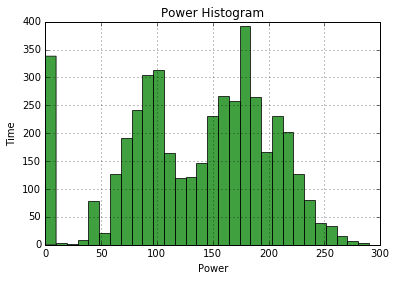

In [35]:
n, bins, patches = plt.hist(power, 30, normed=0, facecolor='g', alpha=0.75)

print n
print bins
print patches

plt.xlabel('Power')
plt.ylabel('Time')
plt.title('Power Histogram')
plt.axis([0, 300, 0, 400])
plt.grid(True)
plt.show()

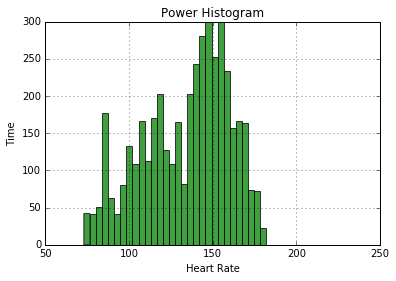

In [36]:
hr = extract_record_field(messages, 'heart_rate')

plt.hist(hr, 30, normed=0, facecolor='g', alpha=0.75)

plt.xlabel('Heart Rate')
plt.ylabel('Time')
plt.title('Power Histogram')
plt.axis([50, 250, 0, 300])
plt.grid(True)
plt.show()

In [37]:
def make_zone(name, low, high):
    zone = {}
    zone['Name'] = name
    zone['Low'] = low
    zone['High'] = high
    
    return zone

In [38]:
em = make_zone('EnduranceMiles', 0.45, 0.73)
print em

{'High': 0.73, 'Name': 'EnduranceMiles', 'Low': 0.45}


In [42]:
training_zones = []
training_zones.append(make_zone('EnduranceMiles', 0.45, 0.73))
training_zones.append(make_zone('Tempo', 0.8, 0.85))
training_zones.append(make_zone('SteadyState', 0.86, 0.90))
training_zones.append(make_zone('ClimbingRepeat', 0.95, 1.0))
training_zones.append(make_zone('PowerInterval', 1.01, 10.0))

print training_zones

[{'High': 0.73, 'Name': 'EnduranceMiles', 'Low': 0.45}, {'High': 0.85, 'Name': 'Tempo', 'Low': 0.8}, {'High': 0.9, 'Name': 'SteadyState', 'Low': 0.86}, {'High': 1.0, 'Name': 'ClimbingRepeat', 'Low': 0.95}, {'High': 10.0, 'Name': 'PowerInterval', 'Low': 1.01}]


In [39]:
def calculate_zone(field_test_power, zone):
    czone = {}
    czone['Name'] = zone['Name']
    czone['Low'] = int(round(zone['Low']*field_test_power))
    czone['High'] = int(round(zone['High']*field_test_power))
    return czone

In [40]:
print calculate_zone(213,em)
print em

{'High': 155, 'Name': 'EnduranceMiles', 'Low': 96}
{'High': 0.73, 'Name': 'EnduranceMiles', 'Low': 0.45}


In [43]:
def power_training_intensities(field_test_power):
    i = []
    for z in training_zones:
        i.append(calculate_zone(field_test_power,z))
        
    return i
    
    

In [45]:
my_intensities = power_training_intensities(213)
for i in my_intensities:
    print '{}: {} - {}'.format(i['Name'],i['Low'],i['High'])

EnduranceMiles: 96 - 155
Tempo: 170 - 181
SteadyState: 183 - 192
ClimbingRepeat: 202 - 213
PowerInterval: 215 - 2130
